Convolutional Neural Networks *(solution)*
================

------
**Deep Learning for Computer Vision**<br>
(c) Research Group CAMMA, University of Strasbourg<br>
Website: http://camma.u-strasbg.fr/
-----

### About this notebook

- **Objectives**: 
  - Train your first convolutional neural network using Tensorflow and Keras
  

- **Instructions**:
  - To make the best use of this notebook, read the provided instructions and code, fill in the *#TODO* blocks, and run the code.
  - Load Cats & Dogs datasets from https://seafile.unistra.fr/f/ca6dc3c7823f44b4a769/?dl=1

Import libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [2]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

Check version of Tensorflow. Version should be >= 2.0.

In [3]:
tf.__version__

'2.8.2'

### Load MNIST dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datasets/' #TO ADAPT IF NEEDED
f = gzip.open(path+'mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f,encoding='bytes')
f.close()

#%% Shuffle the data and define the data variables
X_train,y_train = train_set
X_test,y_test = test_set

inds=np.arange(0,X_train.shape[0])
np.random.shuffle(inds)
X_train,y_train = X_train[inds],y_train[inds] 

inds=np.arange(0,X_test.shape[0])
np.random.shuffle(inds)
X_test,y_test = X_test[inds],y_test[inds] 

print(X_train.shape)
print(X_test.shape)

Mounted at /content/drive
(50000, 784)
(10000, 784)


### Tensorflow model corresponding to a 2-layer neural network

Create the model using the high-level library Keras:

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu',input_shape=(784,)) )
model.add(tf.keras.layers.Dense(10, activation='softmax') )

Print a description of the model:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


Verify by hand that the indicated number of parameters is exact.

Add a loss and define the training parameters:

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #Ground truth provided as class IDs
              metrics=['accuracy'])


Perform the training:

In [8]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 2ms/step - loss: 0.6073 - accuracy: 0.8191
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3232 - accuracy: 0.9098
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.9178
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.9199
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9226


Evaluate the model on the test set:

In [9]:
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.2678 - accuracy: 0.9248 - 612ms/epoch - 2ms/step


[0.26775383949279785, 0.9247999787330627]

Increase the number of hidden nodes to 128 and retrain the model. What do you conclude?

### Use Images as input

Reshape the data:

In [10]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
print(X_train.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)


Use the flattening layer, which linearizes the input, to provide the images directly to the same model:

In [11]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten(input_shape=(28, 28,1)) )
model.add( tf.keras.layers.Dense(64, activation='relu') )
model.add( tf.keras.layers.Dense(10, activation='softmax') )


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model:

In [13]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3311 - accuracy: 0.9075
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1611 - accuracy: 0.9530
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1183 - accuracy: 0.9650
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0916 - accuracy: 0.9730
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9772


Plot the training accuracy:

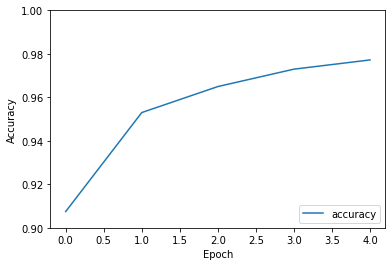

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

Evalute the model on the test set:

In [15]:
model.evaluate(X_test,  y_test, verbose=2)


313/313 - 1s - loss: 0.0889 - accuracy: 0.9714 - 575ms/epoch - 2ms/step


[0.0889173299074173, 0.9714000225067139]

### Use a Convolutional Neural Network:

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28,28,1) ))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        2336      
                                                                 
 flatten_1 (Flatten)         (None, 3872)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                38730     
                                                                 
Total params: 41,146
Trainable params: 41,146
Non-trainable params: 0
__________________________________________________

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 3ms/step - loss: 0.1830 - accuracy: 0.9460
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0649 - accuracy: 0.9797
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0461 - accuracy: 0.9857
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0366 - accuracy: 0.9881
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9910


In [20]:
model.evaluate(X_test,  y_test, verbose=2)


313/313 - 1s - loss: 0.0451 - accuracy: 0.9863 - 648ms/epoch - 2ms/step


[0.04508722946047783, 0.986299991607666]

The obtained accuracy should be around 99%

### Classification on the Cats & Dogs dataset

Load the dataset:

In [21]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datasets/' #TO ADAPT IF NEEDED
f=gzip.open(path+'td_catsdogs2000_u8.pkl.gz', 'rb')
X_data,y_data = pickle.load(f, encoding='bytes')
f.close()

# Split data for train (first 1000 images) and test (the rest) 
X_train= X_data[0:1000,:] 
y_train= y_data[0:1000,:]
X_test= X_data[1000:2000,:]
y_test= y_data[1000:2000,:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
print(X_train.shape)
print(X_test.shape)

(1000, 96, 96, 3)
(1000, 96, 96, 3)


Display a few images along with the ground truth:

(-0.5, 95.5, 95.5, -0.5)

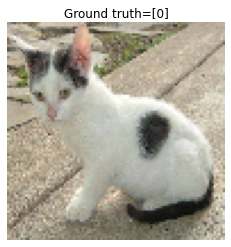

In [23]:
#TODO<
index = 6
im = X_train[index,:]
plt.imshow(im)
plt.title('Ground truth='+str(y_train[index]) )
plt.axis('off')
#TODO>

(-0.5, 95.5, 95.5, -0.5)

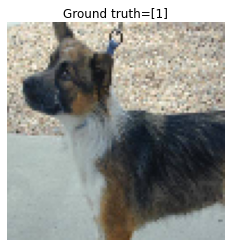

In [24]:
#TODO<
index = 7
im = X_train[index,:]
plt.imshow(im)
plt.title('Ground truth='+str(y_train[index]) )
plt.axis('off')
#TODO>

**(1)** Train a 2-layer neural network classifier with 128 hidden nodes

Define the structure of the model:

In [25]:
#TODO<
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten(input_shape=(96,96,3)) )
model.add( tf.keras.layers.Dense(128, activation='relu') )
model.add( tf.keras.layers.Dense(10, activation='softmax') )
#TODO>

Train the model:

In [26]:
#TODO<
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
#TODO>

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 1329.6866 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 1309.3416 - accuracy: 0.5350
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 299.2593 - accuracy: 0.5880
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 366.7804 - accuracy: 0.5800
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 323.0229 - accuracy: 0.5740


Evaluate the model on the test set:

In [27]:
#TODO<
model.evaluate(X_test,  y_test, verbose=2)
#TODO>

32/32 - 0s - loss: 195.6320 - accuracy: 0.5790 - 163ms/epoch - 5ms/step


[195.63198852539062, 0.5789999961853027]

What do you conclude?

**(2)** Train a simple convolutional neural network classifier

Define a model with 2 convolutional layers separated with a maxpooling layer:

In [28]:
#TODO<
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96,96,3) ))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2, activation='softmax'))
#TODO>

Train the model:

In [29]:
#TODO<
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
#TODO>

Epoch 1/5
32/32 [==============================] - 1s 11ms/step - loss: 138.0367 - accuracy: 0.5040
Epoch 2/5
32/32 [==============================] - 0s 9ms/step - loss: 0.6566 - accuracy: 0.6710
Epoch 3/5
32/32 [==============================] - 0s 9ms/step - loss: 0.4010 - accuracy: 0.8060
Epoch 4/5
32/32 [==============================] - 0s 9ms/step - loss: 0.2822 - accuracy: 0.8780
Epoch 5/5
32/32 [==============================] - 0s 9ms/step - loss: 0.1709 - accuracy: 0.9390


Experiment with different networks by changing the number of channels in the layers and adding/removing layers.

Evaluate the model on the test set:

In [30]:
#TODO<
model.evaluate(X_test,  y_test, verbose=2)
#TODO>

32/32 - 0s - loss: 1.6671 - accuracy: 0.5400 - 253ms/epoch - 8ms/step


[1.6670808792114258, 0.5400000214576721]

What do you conclude?